## Importing Necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

Reading the data from the csv file

In [2]:
df = pd.read_csv('house_data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.columns.nunique()

9

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [11]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


Visualizing the data

<AxesSubplot:>

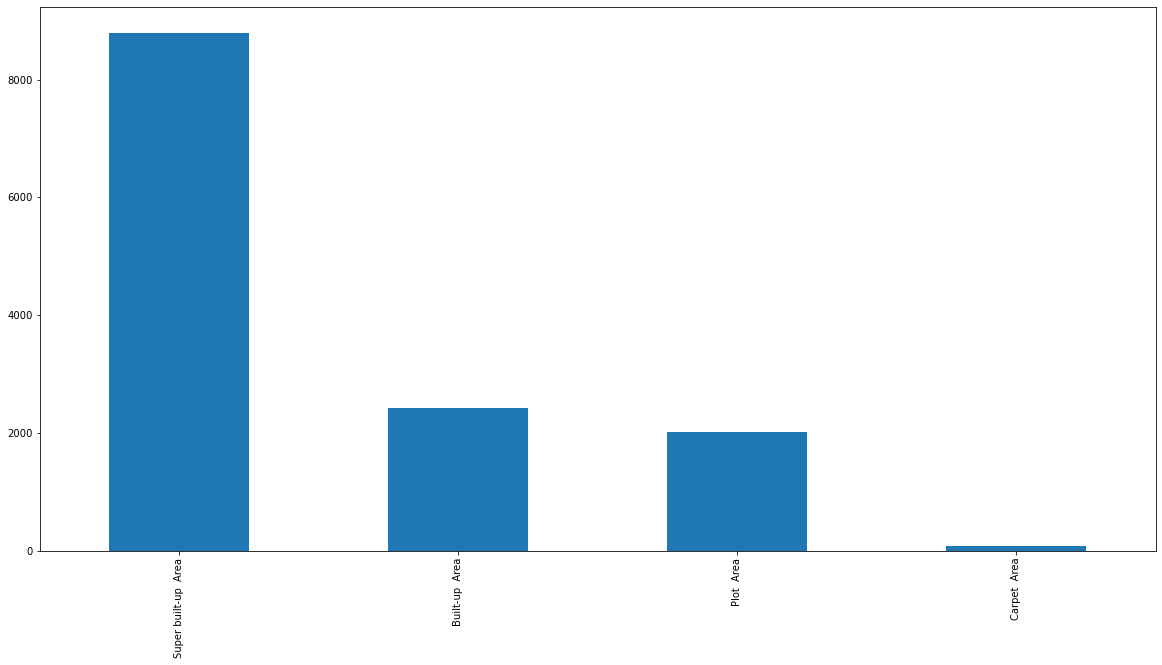

In [12]:
df.area_type.value_counts().plot(kind='bar')

Now removing the un necessary data in the datasets

In [13]:
df2 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
df2.shape

(13320, 5)

In [15]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

## Now for the data cleaning process
Removing the null values

In [16]:
df3 = df2.dropna()

In [17]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [18]:
df3.shape

(13246, 5)

## now starts the featuring process

In [19]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [20]:
## here if we look at the size column there are BHK and bedroom which are totally diferent values
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
## so from the above results in the size columns there are two different methods of showing the total numbner of beds
## Making the new column

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-21-7bc6799fca3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [22]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [23]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [24]:
## Here we can see that one of the house has the 43 bedrooms which is hard to believe so let's check it
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [25]:
## think  that's error because 43 bedrooms with the total_sqft of 2400 seems not good so let's check the total_sqft
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
## here from the avove result we see some value in range i.e. 1133 - 1384
## For this type of value we have to perform the operation to take the average value by 1133 + 1384 / 2

def float_num(x):
    try:
        float(x)
    except:
        return False
    return True

In [27]:
df3[df3['total_sqft'].apply(float_num)].head(8) ### Here it returns the true vlues in the float_num

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4


In [28]:
df3[~df3['total_sqft'].apply(float_num)].head(8) ### Here it returns all the false values present in thje foloat_num functionm

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9


In [29]:
## now writing the function that handles the 900-69 values as well other values like 34.46Sq. Meter
def convert_to_float(x):
    values = x.split('-')
    if len(values) == 2:
        return (float(values[0]) + float(values[1]))/2
    try:
        return float(x)
    except:
        return None
    
        

In [30]:
convert_to_float('2100')

2100.0

In [31]:
convert_to_float('10 - 10')
## outputting the average of two

10.0

In [32]:
(10 + 10) / 2
## Like this

10.0

In [33]:
convert_to_float('34.46Sq. Meter')
## Here the results is none according to function

In [34]:
df3.head(3)
## Here is our original data

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [35]:
## Now applying the function we wrote
## First lets make the copy good pracice

df4 = df3.copy()
df4['total_sqft'] = df3['total_sqft'].apply(convert_to_float)
df4.head(3)

## Here from the result we can see that the value in the total_sqft number is changed into float

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [36]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [37]:
df4 = df4[df4.total_sqft.notnull()]


In [38]:
df4.shape

(13200, 6)

In [39]:
## Checking whether the function works properly or not
df4.loc[122] ## eans the value of 122 index

location      Hebbal
size           4 BHK
total_sqft    5611.5
bath               4
price            477
bhk                4
Name: 122, dtype: object

In [40]:
(3067 + 8156) /2
## It matches

5611.5

In [41]:
df4.shape ## Here we are just ignoring the (4335 Perch) values so the shape is as previous df3

(13200, 6)

## Featuring Engineering

In [42]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [43]:
## Since in real state business price per total square feet is imprtant so we are building the new column called price_per_sqft
## Doinf the operation Price / total_sqft (Since the price is in lakh we multiply it by 100000)
## First lets make a copy

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [44]:
## Now lets come into the location column (which is a categorial or the text data and is difficult to handle)
## First lets check the total number of location data

df5['location'].unique()


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [45]:
len(df5['location'].unique())
## Here we can see that there are 1304 unique values which is really huge

1298

## For Categorial Data
using the concept of dimensolity reduction
SInce there are 1304 unique values in the location columns if we try to to dummies then we will have 1304 columns and this will
be very difficult

In [46]:
df5.location = df5.location.apply(lambda x: x.strip()) ## REmoving the shite space if there are any
## Now seeing how many different values/places are there in the location column
location_stats = df5['location'].value_counts(ascending=True)
location_stats

J P Nagar 7th Phase Ramayya City                        1
bsk 6th stage 2ad block near sri conversation hall      1
Garden Layout                                           1
RMV extension stage 2, rmv extension                    1
Dhanalakshmi Layout                                     1
                                                     ... 
Thanisandra                                           235
Kanakpura Road                                        264
Electronic City                                       304
Sarjapur  Road                                        392
Whitefield                                            533
Name: location, Length: 1287, dtype: int64

In [47]:
## Here checking the values in the location columns which has less than values 10
len(location_stats[location_stats<=10])


1047

## Since there are about 1052 values which is less than 10 we kept this values in the seperate columns other

In [48]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

J P Nagar 7th Phase Ramayya City                       1
bsk 6th stage 2ad block near sri conversation hall     1
Garden Layout                                          1
RMV extension stage 2, rmv extension                   1
Dhanalakshmi Layout                                    1
                                                      ..
Naganathapura                                         10
1st Block Koramangala                                 10
Dairy Circle                                          10
Thyagaraja Nagar                                      10
Sector 1 HSR Layout                                   10
Name: location, Length: 1047, dtype: int64

In [49]:
len(df5.location.unique())

1287

In [50]:
## The above result we will kept in the new ('Other') column
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x) 
## the above function does is it create the new column Other and pt all the values that is less than 10 and other remains same
len(df5.location.unique())

241

In [51]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [52]:
df5.shape

(13200, 7)

Here we will discard some more data. Because, normally if a square ft per bedroom is 300
(i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2
 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by
 keeping our minimum thresold per bhk to be 300 sqft

So if we divide total_sqft / bhk considering the total_sqft per bedroom is 300 then the output must be greater than 300 like

800 / 2 = 400 (greater than 300)
800 / 8 = 100 (less than 300)

In [53]:
df5[df5.total_sqft/df5.bhk < 300].head() ## The following results are error as 600/8 = 77.888 less than 300 (our threshold)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [54]:
df5[~(df5.total_sqft/df5.bhk<300)].head() ## this are good values since 1056 / 2 = 528 greater than 300

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [55]:
df5.shape

(13200, 7)

In [56]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape
## Below is the value after removing the outliers or the wrong data

(12456, 7)

<h2>Now looking for the column 'price_per_sqft'</h2>


In [57]:
df6.price_per_sqft.describe()
## Here checking the price and seeing the minimum and maximum values per square ft
## when we see the maximum values it is extremely high as it might possible but we want to build the generic model it will be
## good to remove sunch extreme cases

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [58]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

## As comparing the the shape of above dataframe we remove aout 2000 values which is an otlier
## Normal Data distribution means 

(10242, 7)

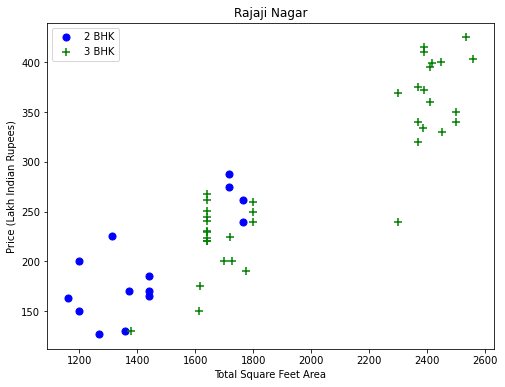

In [59]:
### Now Visualizing the data to find the outliers like: 
# We are checking if 3 bedrooms has more sqft and more price than the two bedrooms area

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [60]:
## Here in the above figure we can see that in between 1600 - 1800 having the same sqft the price of 2 bedrroms is more than 3

In [61]:
df7.bhk.value_counts()

2     4756
3     4002
4      745
1      518
5      108
6       62
7       20
8       16
9        8
10       3
11       2
13       1
16       1
Name: bhk, dtype: int64

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}


In [62]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

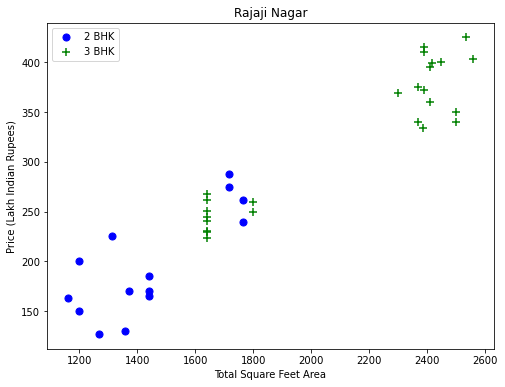

In [63]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

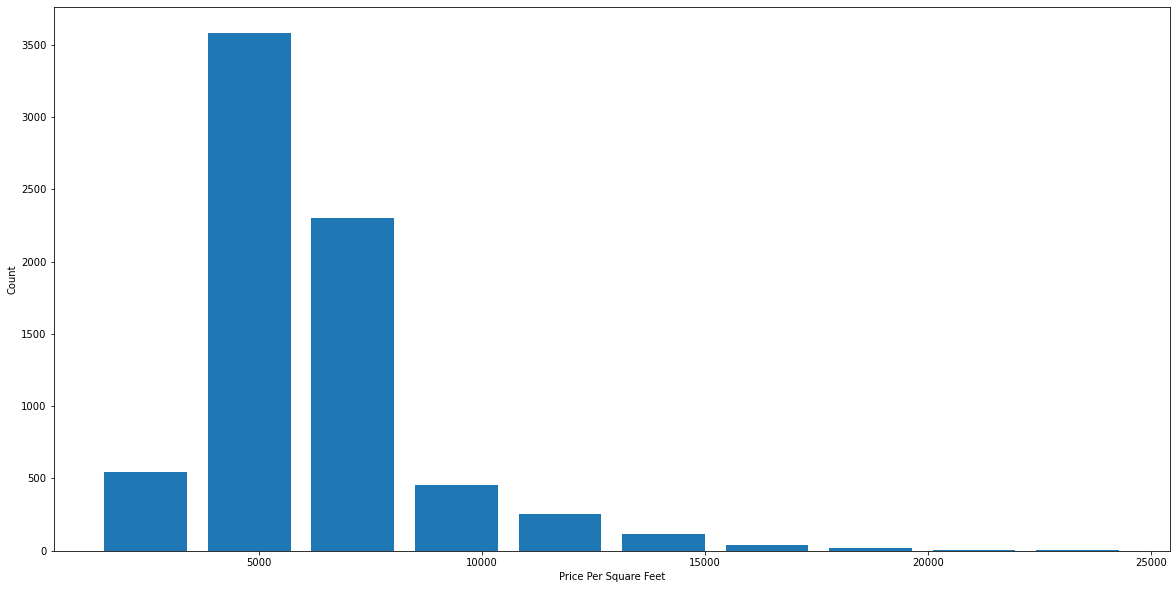

In [64]:
## From the above figure we can see that all values are gone whose price is less than the two bedrooms

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
## From the below figure we see that between 0 - 10000 per square there are more data points

## Now looking for the Bathroom parts
Suppose if we have 2 bedroom and 4 5 bathroom then that is of no use so we try to filter out those outliers

In [65]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [66]:
## Now lets look the data which has more than 10 bedrooms
df8[df8.bath > 10]
## The below results is quite good as there is similar equality between the bedrooms and bathrooms as well total_sqft also good

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


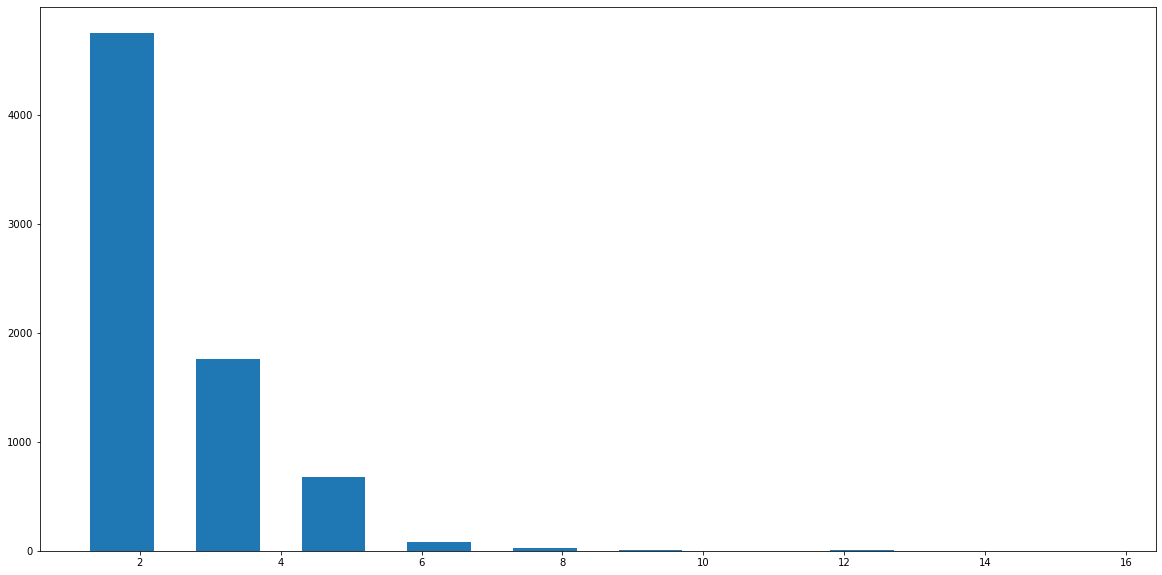

In [67]:
## Lets plot and look
plt.hist(df8.bath, rwidth=0.6)
plt.xlabel = "Number of bathrooms"
plt.ylabel = "count"

In [68]:
## Considering the fact that it is un usual to have 2 more bathrooms than the number of bedroom in a home

df8[df8.bath > df8.bhk + 2]
## These are outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [69]:
## So the real values is
df9 = df8[df8.bath < df8.bhk + 2]
df9.shape

(7239, 7)

In [70]:
df9.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333


In [71]:
## Now removing un necessary columns like size and price_per_sqft because we have used in only to remove outliers
df10 = df9.drop(['size', 'price_per_sqft'], axis=1)
df10.head(3)


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [72]:
df10.shape

(7239, 5)

Doing one hot encoding in the location columns

In [73]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
## Now to aviod the dummines trap we can remove one of the columns like of we remove 1st Block Jayanagar then if it present
# then all other columns remains 0 and since reflect the original column 1st block jayanagar
df11 = pd.concat([df10,dummies.drop('other', axis='columns')], axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
## Now we can drop the location columns
df12 = df11.drop('location',axis='columns')
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df12.shape

(7239, 244)

### Now Building a Model

In [77]:
X = df12.drop('price',axis='columns')
y = df12.price

In [78]:
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [79]:
X.shape

(7239, 243)

In [80]:
y.shape

(7239,)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [82]:
### Trting through linear regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,y_train)
lreg.score(X_test,y_test)

0.8629132245229449

## Using K Fold Cross validation to check the model of linear regression

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=6, test_size=0.2, random_state=10)
cross_val_score(LinearRegression(),X, y, cv=cv)

array([0.86291322, 0.85632943, 0.87669838, 0.80558377, 0.79969281,
       0.84376698])

Here we can see that we are getting above 80% accuracy in each time

 Now lets check with other algorithms



In [84]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726821,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.717615,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


 Here the Linear regression is better model than other so we use it
 we already train the model above so we use it <br>
 
 Now writing the fuction to test the model

In [85]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [86]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lreg.predict([x])[0]

In [87]:

predict_price('1st Phase JP Nagar',1000, 2, 2)

83.86570258311215

In [88]:

predict_price('1st Phase JP Nagar',1000, 3, 3)

86.08062284985986

In [89]:
predict_price('1st Phase JP Nagar',1000, 2, 3) ## In that much of space the bedrooms are little tight and conjustec so less

82.36367614309174

In [93]:
predict_price('1st Phase JP Nagar',2000, 2, 2)

163.9836057862621

In [90]:
predict_price('Indira Nagar',1000, 2, 2)

193.3119773317955

## Exporting the model to pickle file

In [91]:
import pickle
with open('banglore_house_prices_model.pickle','wb') as f:
    pickle.dump(lreg,f)

Exporing location and other columns that will be seful while prediction on the application

In [92]:

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))